## Womenintech Python Bitirme Projesi
## e-commerce datası
## Duygu Kaya 

İlk önce kodumuzda kullanacağımız kütüphaneleri import ettik.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import folium
from wordcloud import WordCloud

Daha sonra tüm veri setlerimizi pandas kütüphanesinin read_csv fonksiyonunu kullanarak okuduk.

In [2]:
customers = pd.read_csv("customers_dataset.csv")
geolocation = pd.read_csv("geolocation_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")
order_reviews = pd.read_csv("order_reviews_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
product_category = pd.read_csv("product_category_name_translation.csv")
products = pd.read_csv("products_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")

Girdiğimiz veri setlerinin satır-sütun sayısını, değişken tiplerini ve datamızın ilk 5 satırını veren fonksiyon yazdık.

In [3]:
def check_dataset(dataset):
    print(f'Datasetimizde {dataset.shape[0]} satır ve {dataset.shape[1]} sütun vardır. \n')
    print("-----------------------------------------------------------------------------\n")
    print(f'Dataset içindeki değerlerimizin tipi \n{dataset.dtypes} şeklindedir.\n')
    print("-----------------------------------------------------------------------------\n")
    print(f'Datasetin ilk 5 satırını incelersek \n{dataset.head()}')

Veri setimiz hakkında daha fazla bilgi sahibi olabilmek için info, describe ve boş verilerimiz olup olmadığını kontrol etmek için isnull fonksiyonlarını kullandık.

In [4]:
def explore_dataset(dataset):
    print(f'Datasetimiz hakkında özet bilgi öğrenelim \n{dataset.info()} \n')
    print("-----------------------------------------------------------------------------\n")
    print(f'Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için \n{dataset.describe().T} \n')
    print("-----------------------------------------------------------------------------\n")
    print(f'Datasetimizin null değerlerini görelim \n{pd.isnull(dataset).sum()} \n')

Çok fazla veri setimiz olduğundan şimdilik sadece müşteri (customer_dataset) veri setini inceleyeceğiz.

In [5]:
check_dataset(customers)

Datasetimizde 99441 satır ve 5 sütun vardır. 

-----------------------------------------------------------------------------

Dataset içindeki değerlerimizin tipi 
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object şeklindedir.

-----------------------------------------------------------------------------

Datasetin ilk 5 satırını incelersek 
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0         

In [6]:
explore_dataset(customers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Datasetimiz hakkında özet bilgi öğrenelim 
None 

-----------------------------------------------------------------------------

Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için 
                            count          mean           std     min  \
customer_zip_code_prefix  99441.0  35137.474583  29797.938996  1003.0   

                              25%      50%      75%      max  
customer_zip_code_prefix  11347.0  24416.0  58900.0  99990.0   


In [7]:
check_dataset(sellers)

Datasetimizde 3095 satır ve 4 sütun vardır. 

-----------------------------------------------------------------------------

Dataset içindeki değerlerimizin tipi 
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object şeklindedir.

-----------------------------------------------------------------------------

Datasetin ilk 5 satırını incelersek 
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4 

In [8]:
explore_dataset(sellers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Datasetimiz hakkında özet bilgi öğrenelim 
None 

-----------------------------------------------------------------------------

Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için 
                         count          mean          std     min     25%  \
seller_zip_code_prefix  3095.0  32291.059451  32713.45383  1001.0  7093.5   

                            50%      75%      max  
seller_zip_code_prefix  14940.0  64552.5  99730.0   

-----------------------------------------------------------------------------

D

Hazır müşteri ve satıcı veri setlerini okumuşken verimize ilk soruyu soralım: Hangi eyalette kaç satıcı kaç müşteri var?

In [9]:
customers.rename({'customer_state' : 'states'}, inplace = True, axis = 1)
sellers.rename({'seller_state' : 'states'}, inplace = True, axis = 1)

In [10]:
customers_state = customers.groupby(["states"]).agg({'customer_id' : 'size'})
customers_state

customer_id
states             
AC               81
AL              413
AM              148
AP               68
BA             3380
CE             1336
DF             2140
ES             2033
GO             2020
MA              747
MG            11635
MS              715
MT              907
PA              975
PB              536
PE             1652
PI              495
PR             5045
RJ            12852
RN              485
RO              253
RR               46
RS             5466
SC             3637
SE              350
SP            41746
TO              280

In [11]:
sellers_state = sellers.groupby(["states"]).agg({'seller_id' : 'size'})

sellers_and_customers = customers_state.merge(sellers_state, how = 'inner', on = 'states')
sellers_and_customers

customer_id  seller_id
states                        
AC               81          1
AM              148          1
BA             3380         19
CE             1336         13
DF             2140         30
ES             2033         23
GO             2020         40
MA              747          1
MG            11635        244
MS              715          5
MT              907          4
PA              975          1
PB              536          6
PE             1652          9
PI              495          1
PR             5045        349
RJ            12852        171
RN              485          5
RO              253          2
RS             5466        129
SC             3637        190
SE              350          2
SP            41746       1849

In [12]:
sellers_and_customers.reset_index(inplace = True)
sellers_and_customers = sellers_and_customers.rename(columns = {'index' : 'states', 
                                                                'customer_id' : 'customers', 
                                                                'seller_id' : 'sellers'})
sellers_and_customers

states  customers  sellers
0      AC         81        1
1      AM        148        1
2      BA       3380       19
3      CE       1336       13
4      DF       2140       30
5      ES       2033       23
6      GO       2020       40
7      MA        747        1
8      MG      11635      244
9      MS        715        5
10     MT        907        4
11     PA        975        1
12     PB        536        6
13     PE       1652        9
14     PI        495        1
15     PR       5045      349
16     RJ      12852      171
17     RN        485        5
18     RO        253        2
19     RS       5466      129
20     SC       3637      190
21     SE        350        2
22     SP      41746     1849

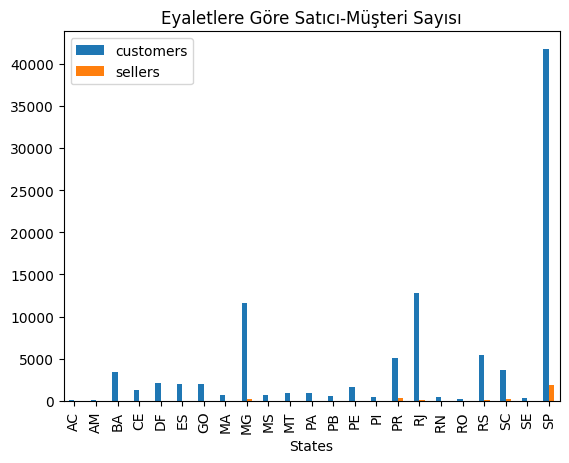

In [13]:
sellers_and_customers.plot(x = "states", y = ["customers", "sellers"], kind = "bar")
plt.title("Eyaletlere Göre Satıcı-Müşteri Sayısı")
plt.xlabel("States")

plt.show()

Görüldüğü üzere SP(Sao Paulo) eyaleti diğer eyaletlere kıyasla çok daha fazla müşteriye sahip görünüyor. 
O yüzden bir de onu çıkartıp diğer eyaletlerin karşılaştırmalarına bakalım.

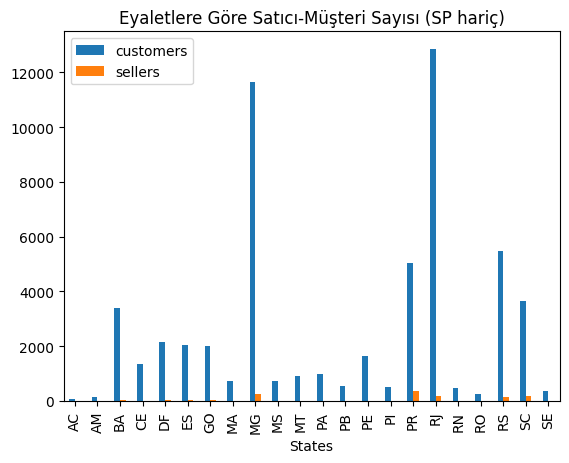

In [14]:
sellers_and_customers_filtered = sellers_and_customers[(sellers_and_customers.states != "SP")]
sellers_and_customers_filtered.plot(x = "states", y = ["customers", "sellers"], kind = "bar")
plt.title("Eyaletlere Göre Satıcı-Müşteri Sayısı (SP hariç)")
plt.xlabel("States")

plt.show()

İlk analizimizden de gördüğümüz gibi eyaletlerdeki müşteri sayısı, satıcı sayısına göre çok fazla.

In [15]:
check_dataset(order_items)

Datasetimizde 112650 satır ve 7 sütun vardır. 

-----------------------------------------------------------------------------

Dataset içindeki değerlerimizin tipi 
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object şeklindedir.

-----------------------------------------------------------------------------

Datasetin ilk 5 satırını incelersek 
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  

In [16]:
explore_dataset(order_items)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Datasetimiz hakkında özet bilgi öğrenelim 
None 

-----------------------------------------------------------------------------

Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için 
                  count        mean         std   min    25%    50%     75%  \
order_item_id  112650.0    1.197834    0.705124  1.00   1.00   1.00    1.00   
price          112650

In [17]:
check_dataset(products)

Datasetimizde 32951 satır ve 9 sütun vardır. 

-----------------------------------------------------------------------------

Dataset içindeki değerlerimizin tipi 
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object şeklindedir.

-----------------------------------------------------------------------------

Datasetin ilk 5 satırını incelersek 
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  uti

In [18]:
explore_dataset(products)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Datasetimiz hakkında özet bilgi öğrenelim 
None 

-----------------------------------------------------------------------------

Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için 
                       

In [19]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

order_items veri setini incelediğimizde gördüğümüz "freight value" yani navlun ücreti, deniz ve nehir yolu ile taşınan eşya için, taşıma hizmeti karşılığında gemi şirketine ödenen ücret anlamındaymış. Yanında da fiyat sütunu olunca ve de diğer incelediğimiz products veri setinde product_weight_g, product_length_cm, product_height_cm, product_width_cm gibi sütunlar olunca aklıma bir soru geldi: Acaba ürünün ağırlığı ya da hacmi ile taşıma hizmeti ücreti arasında bir ilişki var mı?

In [20]:
products['product_weight_g'] = products['product_weight_g'].fillna(products.product_weight_g.mean())
products['product_length_cm'] = products['product_length_cm'].fillna(products.product_length_cm.mean())
products['product_height_cm'] = products['product_height_cm'].fillna(products.product_height_cm.mean())
products['product_width_cm'] = products['product_width_cm'].fillna(products.product_width_cm.mean())

In [21]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [22]:
product_value = order_items.merge(products, on = 'product_id', how = 'inner')
product_value

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
112645  ffebd80e3291e811c308365936897efd              1   
112646  ffee31fb4b5e35c9123608015637c495              1   
112647  fff7c4452f050315db1b3f24d9df5fcd              1   
112648  fffa82886406ccf10c7b4e35c4ff2788              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
112645  4cc4d02efc8f249c13355147fb44e34d  d1c7fa84e48cfa21a0e595167c1c500e   
112646  b10ecf8e33aaaea419a9fa860ea80fb5  0241d4d5d36f10f80c644447315af0bd   
112647  dd469c03ad67e201bc2179ef077dcd48  7e93a43ef30c4f03f38b393420bc753a   
112648  bbe7651fef80287a816ead73f065fc4b  8f2ce03f928b567e3d56181ae20ae952   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  price  freight_value product_category_name  \
0       2017-09-19 09:45:35   58.9          13.29            cool_stuff   
1       2017-07-05 02:44:11   55.9          17.96            cool_stuff   
2       2018-05-23 10:56:25   64.9          18.33            cool_stuff   
3       2017-08-07 18:55:08   58.9          16.17            cool_stuff   
4       2017-08-16 22:05:11   58.9          13.29            cool_stuff   
...                     ...    ...            ...                   ...   
112645  2018-07-18 20:23:55  129.9          51.20    ferramentas_jardim   
112646  2018-08-21 10:10:11   99.0          13.52      moveis_decoracao   
112647  2017-06-07 17:05:23  736.0          20.91    relogios_presentes   
112648  2017-12-22 17:31:42  229.9          44.02         esporte_lazer   
112649  2018-06-12 17:10:13   43.0          12.79       cama_mesa_banho   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      58.0                       598.0                 4.0   
1                      58.0                       598.0                 4.0   
2                      58.0                       598.0                 4.0   
3                      58.0                       598.0                 4.0   
4                      58.0                       598.0                 4.0   
...                     ...                         ...                 ...   
112645                 37.0                       653.0                 1.0   
112646                 30.0                       308.0                 1.0   
112647                 33.0                       658.0                 3.0   
112648                 32.0                       280.0                 2.0   
112649                 47.0                       511.0                 1.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  650.0               28.0                9.0   
1                  650.0               28.0                9.0   
2                  650.0               28.0                9.0   
3                  650.0               28.0                9.0   
4                  650.0               28.0                9.0   
...                  ...                ...                ...   
112645            6700.0               35.0               12.0   
112646  

In [23]:
scatter = px.scatter(product_value, x ='product_weight_g', y ='freight_value',)
scatter = scatter.update_layout(
    title = "Ağırlık ve Yük Taşıma Ücreti arasındaki Oran",
    xaxis_title = "Weight",
    yaxis_title = "Freight Value",)
scatter.show()

In [24]:
product_value["product_volume"] = product_value['product_length_cm'] * product_value['product_height_cm'] * product_value['product_width_cm']

In [25]:
scatter = px.scatter(product_value, x ='product_volume', y ='freight_value')
scatter = scatter.update_layout(
    title = "Hacim ve Yük Taşıma Ücreti arasındaki Oran",
    xaxis_title = "Volume",
    yaxis_title = "Freight Value",)
scatter.show()

Bu grafiğimizden aslında ürünün ağırlığının ve hacminin, yük taşıma ücretini direkt doğrusal bir şekilde etkilemediklerini gördük. Ama grafiklere bakarak ağırlık ve hacimin belli bir maksimum değeri olduğunu söyleyebiliriz.

products veri setimiz üzerinden devam edersek product_category_name sütunu bir soru daha sordurtuyor bize: Hangi kategoriden ne kadar ürün satılmış?

In [26]:
product_value = product_value.merge(product_category, on = 'product_category_name', how = 'inner')
product_value

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
111018  b99217b1fcf2fdeace7b8d869b76cb91              1   
111019  bc3ac768a8963f4ca68942ea6558fc9f              1   
111020  cab08f0417a702d0f4782ec02356a4ac              1   
111021  cb53f0b6e8f9082a9f5a113765dd1236              1   
111022  ee86b68eb9222b0cad7da50f4f758a35              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
111018  57bdf3098169cccdb62221bd3e089cbd  d98eec89afa3380e14463da2aabaea72   
111019  57bdf3098169cccdb62221bd3e089cbd  d98eec89afa3380e14463da2aabaea72   
111020  8cfc3506cedc0626364457d254429118  dbb9b48c841a0e39e21f98e1a6b2ec3e   
111021  8cfc3506cedc0626364457d254429118  dbb9b48c841a0e39e21f98e1a6b2ec3e   
111022  0ab3ab3b2869073aa9afe795fe9151aa  28ea411b354f14b1a494be4e79f0ce02   

        shipping_limit_date   price  freight_value  \
0       2017-09-19 09:45:35   58.90          13.29   
1       2017-07-05 02:44:11   55.90          17.96   
2       2018-05-23 10:56:25   64.90          18.33   
3       2017-08-07 18:55:08   58.90          16.17   
4       2017-08-16 22:05:11   58.90          13.29   
...                     ...     ...            ...   
111018  2018-03-13 17:55:36   39.99          10.15   
111019  2018-03-28 03:09:01   39.99           6.43   
111020  2017-10-09 04:28:12   89.99          17.07   
111021  2018-06-11 22:50:09   89.99           7.49   
111022  2017-05-24 17:55:12  110.00          14.52   

                product_category_name  product_name_lenght  \
0                          cool_stuff                 58.0   
1                          cool_stuff                 58.0   
2                          cool_stuff                 58.0   
3                          cool_stuff                 58.0   
4                          cool_stuff                 58.0   
...                               ...                  ...   
111018  fashion_roupa_infanto_juvenil                 38.0   
111019  fashion_roupa_infanto_juvenil                 38.0   
111020  fashion_roupa_infanto_juvenil                 47.0   
111021  fashion_roupa_infanto_juvenil                 47.0   
111022  fashion_roupa_infanto_juvenil                 52.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
0                            598.0                 4.0             650.0   
1                            598.0                 4.0             650.0   
2                            598.0                 4.0             650.0   
3                            598.0                 4.0             650.0   
4                            598.0                 4.0             650.0   
...                            ...                 ...               ...   
111018                       168.0                 1.0             100.0   
111019                       168.0                 1.0             100.0   
111020                       327.0                 3.0             300.0   
111021                       327.0                 3.0             300.0   
111022                       494.0                 4.0             600.0   

        product_length_cm  product_height_cm  product_width_cm  \
0            

In [27]:
product_value[['order_id', 'product_id', 'seller_id', 'product_category_name', 'product_category_name_english']]

order_id                        product_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1       130898c0987d1801452a8ed92a670612  4244733e06e7ecb4970a6e2683c13e61   
2       532ed5e14e24ae1f0d735b91524b98b9  4244733e06e7ecb4970a6e2683c13e61   
3       6f8c31653edb8c83e1a739408b5ff750  4244733e06e7ecb4970a6e2683c13e61   
4       7d19f4ef4d04461989632411b7e588b9  4244733e06e7ecb4970a6e2683c13e61   
...                                  ...                               ...   
111018  b99217b1fcf2fdeace7b8d869b76cb91  57bdf3098169cccdb62221bd3e089cbd   
111019  bc3ac768a8963f4ca68942ea6558fc9f  57bdf3098169cccdb62221bd3e089cbd   
111020  cab08f0417a702d0f4782ec02356a4ac  8cfc3506cedc0626364457d254429118   
111021  cb53f0b6e8f9082a9f5a113765dd1236  8cfc3506cedc0626364457d254429118   
111022  ee86b68eb9222b0cad7da50f4f758a35  0ab3ab3b2869073aa9afe795fe9151aa   

                               seller_id          product_category_name  \
0       48436dade18ac8b2bce089ec2a041202                     cool_stuff   
1       48436dade18ac8b2bce089ec2a041202                     cool_stuff   
2       48436dade18ac8b2bce089ec2a041202                     cool_stuff   
3       48436dade18ac8b2bce089ec2a041202                     cool_stuff   
4       48436dade18ac8b2bce089ec2a041202                     cool_stuff   
...                                  ...                            ...   
111018  d98eec89afa3380e14463da2aabaea72  fashion_roupa_infanto_juvenil   
111019  d98eec89afa3380e14463da2aabaea72  fashion_roupa_infanto_juvenil   
111020  dbb9b48c841a0e39e21f98e1a6b2ec3e  fashion_roupa_infanto_juvenil   
111021  dbb9b48c841a0e39e21f98e1a6b2ec3e  fashion_roupa_infanto_juvenil   
111022  28ea411b354f14b1a494be4e79f0ce02  fashion_roupa_infanto_juvenil   

       product_category_name_english  
0                         cool_stuff  
1                         cool_stuff  
2                         cool_stuff  
3                         cool_stuff  
4                         cool_stuff  
...                              ...  
111018     fashion_childrens_clothes  
111019     fashion_childrens_clothes  
111020     fashion_childrens_clothes  
111021     fashion_childrens_clothes  
111022     fashion_childrens_clothes  

[111023 rows x 5 columns]

In [28]:
order_categories = product_value.groupby(['product_category_name_english'], as_index = False)['order_id'].count().rename(columns = {'order_id':'total_order'})
order_categories['%'] = round((order_categories['total_order'] / order_categories['total_order'].sum()) * 100, 2)
order_categories.nlargest(5, 'total_order')

product_category_name_english  total_order      %
7                 bed_bath_table        11115  10.01
43                 health_beauty         9670   8.71
65                sports_leisure         8641   7.78
39               furniture_decor         8334   7.51
15         computers_accessories         7827   7.05

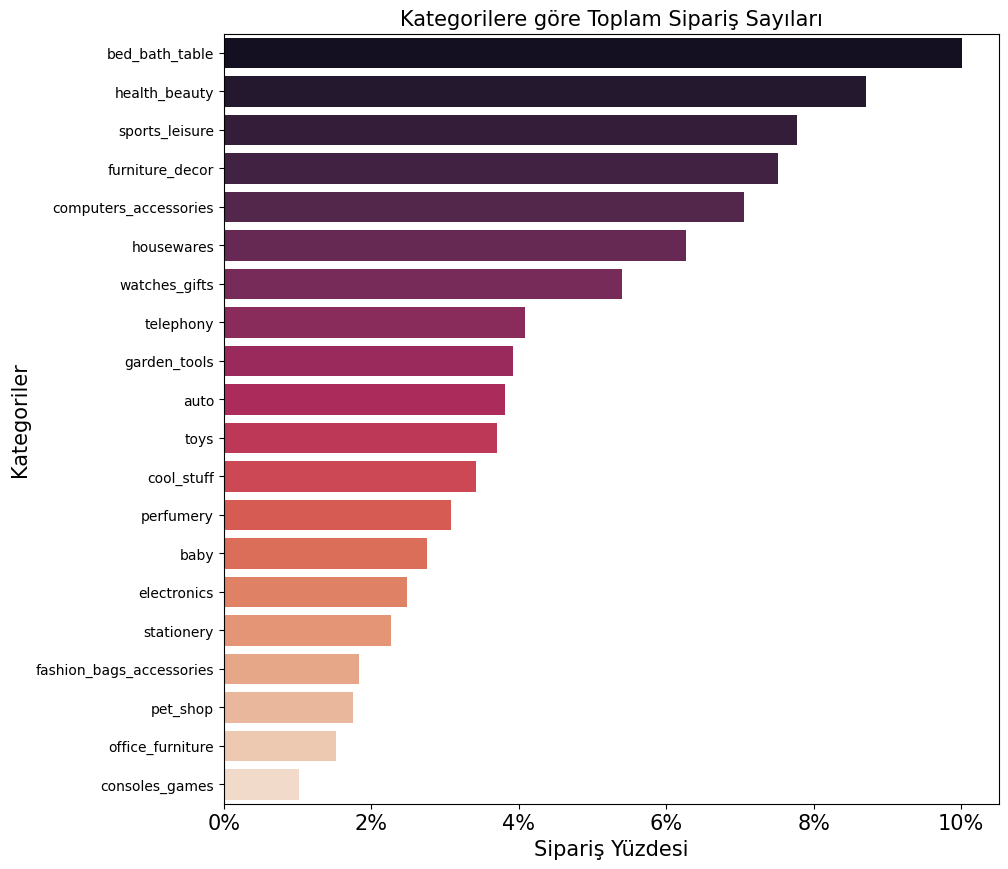

In [29]:
plt.figure(figsize=(10, 10))
sns.barplot(y = 'product_category_name_english', x = '%', palette = 'rocket', data = order_categories.nlargest(20, '%'))

plt.title('Kategorilere göre Toplam Sipariş Sayıları', size = 15)
plt.yticks(fontsize = 10, color = 'black');
plt.xticks([0, 2, 4, 6, 8, 10] , ['0%', '2%', '4%', '6%', '8%', '10%'], fontsize = 15);
plt.xlabel("Sipariş Yüzdesi", fontsize = 15);
plt.ylabel("Kategoriler", fontsize = 15);
plt.show()

Bu grafikten gördüğümüz gibi birinci sırada yatak-banyo-masa siparişleri varken, ikinci sırada sağlık-güzellik ürünlerinin siparişinin fazla olduğunu görüyoruz ve onları spor ürünleri takip ediyor. Müşterilerin hangi kategori ürünlerini ne oranla sipariş verdiklerini bu analiz sayesinde daha iyi anlayabiliriz.

In [30]:
check_dataset(order_payments)

Datasetimizde 103886 satır ve 5 sütun vardır. 

-----------------------------------------------------------------------------

Dataset içindeki değerlerimizin tipi 
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object şeklindedir.

-----------------------------------------------------------------------------

Datasetin ilk 5 satırını incelersek 
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1               

In [31]:
explore_dataset(order_payments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Datasetimiz hakkında özet bilgi öğrenelim 
None 

-----------------------------------------------------------------------------

Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için 
                         count        mean         std  min    25%    50%  \
payment_sequential    103886.0    1.092679    0.706584  1.0   1.00    1.0   
payment_installments  103886.0    2.853349    2.687051  0.0   1.00    1.0   
payment_value         103886.0  154.100380 

order_payments veri setini incelediğimizde aklımıza bir soru daha geliyor: Acaba müşteriler hangi ödeme yöntemini tercih ediyor?

In [32]:
order_payments.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [33]:
index_type = order_payments[(order_payments['payment_type']) == "not_defined"].index
order_payments.drop(index_type , inplace = True)
order_payments.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: payment_type, dtype: int64

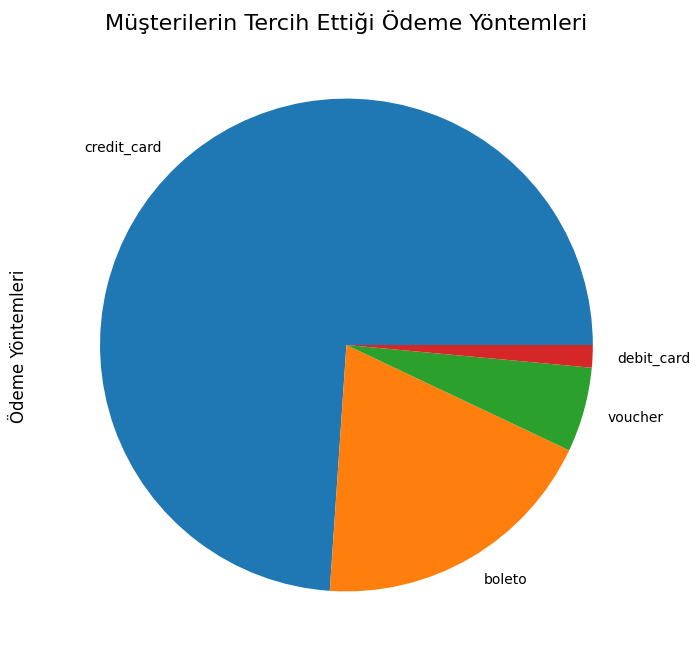

In [34]:
plt.figure(figsize=(8, 8))
(order_payments["payment_type"]
 .value_counts()
 .plot.pie()
 .set_title("Müşterilerin Tercih Ettiği Ödeme Yöntemleri", size = 16));
plt.ylabel("Ödeme Yöntemleri", fontsize = 12);

Yukarıdaki grafikte de görüldüğü gibi müşterilerin yarısından fazlası kredi kartı ile ödemeyi seçiyor.

order_payments veri setini incelerken payment_value sütununda bazı aykırı değerler olabileceğini görmüştük. Bakalım boxplot grafiği yöntemi ile aykırı değerleri rahatlıkla görebilecek miyiz?

In [35]:
print("Minimum Payment Value:", order_payments.payment_value.min())
print("Ortalama Payment Value:", order_payments.payment_value.mean())
print("Maksimum Payment Value:", order_payments.payment_value.max())

Minimum Payment Value: 0.0
Ortalama Payment Value: 154.1048306267628
Maksimum Payment Value: 13664.08


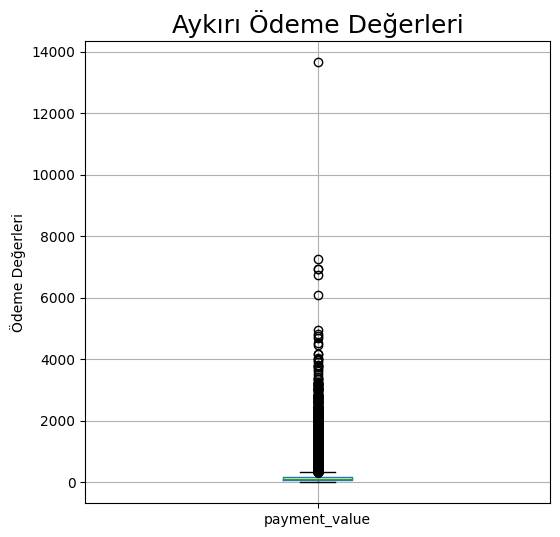

In [36]:
order_payments.boxplot(column='payment_value', figsize=(6,6))
plt.title('Aykırı Ödeme Değerleri', size = 18)
plt.ylabel("Ödeme Değerleri");
plt.show()

In [37]:
order_payments[order_payments['payment_value'] == 13664.08]

order_id  payment_sequential payment_type  \
52107  03caa2c082116e1d31e67e9ae3700499                   1  credit_card   

       payment_installments  payment_value  
52107                     1       13664.08

En yüksek ödeme değerini yapan kişinin tek taksit ile ödemesini görmem üzerine bir soru daha aklıma geldi: Acaba insanlar siparişlerini genelde kaç taksit ile ödemeyi seçiyor?

In [38]:
order_payments

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103883 rows x 5 columns]

In [39]:
order_payments_installments = order_payments.groupby("payment_installments").agg({'order_id' : 'count'})
order_payments_installments.head()

order_id
payment_installments          
0                            2
1                        52543
2                        12413
3                        10461
4                         7098

In [40]:
order_payments_installments.reset_index(inplace = True)
order_payments_installments = order_payments_installments.rename(columns = {'index' : 'payment_installments'})

In [41]:
order_payments_installments.tail()

payment_installments  order_id
19                    20        17
20                    21         3
21                    22         1
22                    23         1
23                    24        18

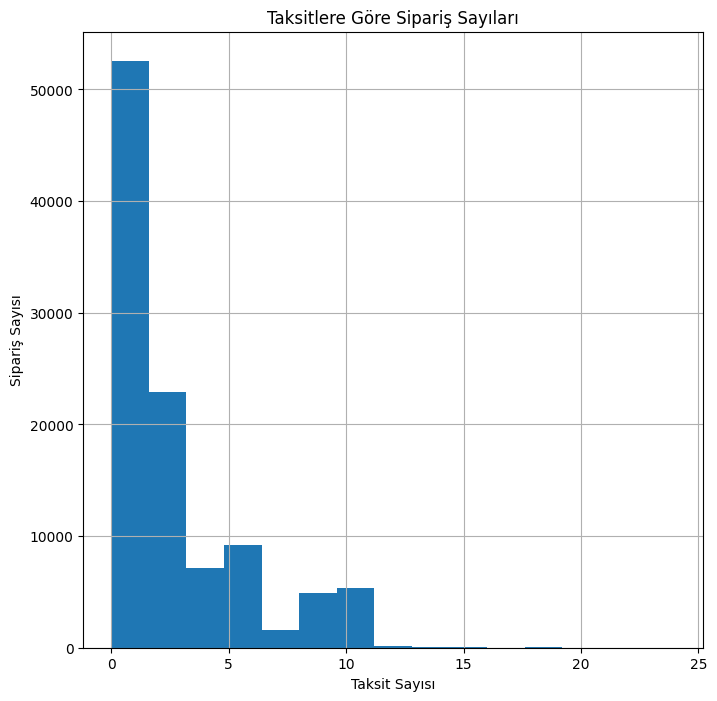

In [42]:
plt.figure(figsize=(8, 8))

order_payments['payment_installments'].hist(bins = 15)
plt.xlabel('Taksit Sayısı')
plt.ylabel('Sipariş Sayısı')
plt.title('Taksitlere Göre Sipariş Sayıları')
plt.show()

Grafikten de gördüğümüz gibi genelde insanlar 12 taksit ve altını seçmişler, yani çoğu insan en az 1 sene içinde aldığı ürünün ödemesini bitirmek istiyor diye yorumlayabiliriz.

In [43]:
check_dataset(order_reviews)

Datasetimizde 99224 satır ve 7 sütun vardır. 

-----------------------------------------------------------------------------

Dataset içindeki değerlerimizin tipi 
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object şeklindedir.

-----------------------------------------------------------------------------

Datasetin ilk 5 satırını incelersek 
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score

In [44]:
explore_dataset(order_reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Datasetimiz hakkında özet bilgi öğrenelim 
None 

-----------------------------------------------------------------------------

Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için 
                count      mean       std  min  25%  50%  75%  max
review_score  99224.0  4.086421  1.347579  1.0  4.0  5.0  5.0  5.0 

---------------------------------------

In [45]:
product_reviews = product_value.merge(order_reviews, on = 'order_id', how = 'inner')
product_reviews

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
110745  3da4b0f0c89bb8fee8a810459e641414              1   
110746  9fa3a005f89a187501fa1bd63d6125fb              1   
110747  cab08f0417a702d0f4782ec02356a4ac              1   
110748  cb53f0b6e8f9082a9f5a113765dd1236              1   
110749  ee86b68eb9222b0cad7da50f4f758a35              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
110745  28ac6af4008a402e5039f3e042a36e13  28ea411b354f14b1a494be4e79f0ce02   
110746  57bdf3098169cccdb62221bd3e089cbd  d98eec89afa3380e14463da2aabaea72   
110747  8cfc3506cedc0626364457d254429118  dbb9b48c841a0e39e21f98e1a6b2ec3e   
110748  8cfc3506cedc0626364457d254429118  dbb9b48c841a0e39e21f98e1a6b2ec3e   
110749  0ab3ab3b2869073aa9afe795fe9151aa  28ea411b354f14b1a494be4e79f0ce02   

        shipping_limit_date   price  freight_value  \
0       2017-09-19 09:45:35   58.90          13.29   
1       2017-07-05 02:44:11   55.90          17.96   
2       2018-05-23 10:56:25   64.90          18.33   
3       2017-08-07 18:55:08   58.90          16.17   
4       2017-08-16 22:05:11   58.90          13.29   
...                     ...     ...            ...   
110745  2017-06-15 18:20:19  110.00           8.96   
110746  2017-10-16 01:17:50   39.99          14.10   
110747  2017-10-09 04:28:12   89.99          17.07   
110748  2018-06-11 22:50:09   89.99           7.49   
110749  2017-05-24 17:55:12  110.00          14.52   

                product_category_name  product_name_lenght  \
0                          cool_stuff                 58.0   
1                          cool_stuff                 58.0   
2                          cool_stuff                 58.0   
3                          cool_stuff                 58.0   
4                          cool_stuff                 58.0   
...                               ...                  ...   
110745  fashion_roupa_infanto_juvenil                 48.0   
110746  fashion_roupa_infanto_juvenil                 38.0   
110747  fashion_roupa_infanto_juvenil                 47.0   
110748  fashion_roupa_infanto_juvenil                 47.0   
110749  fashion_roupa_infanto_juvenil                 52.0   

        product_description_lenght  ...  product_height_cm  product_width_cm  \
0                            598.0  ...                9.0              14.0   
1                            598.0  ...                9.0              14.0   
2                            598.0  ...                9.0              14.0   
3                            598.0  ...                9.0              14.0   
4                            598.0  ...                9.0              14.0   
...                            ...  ...                ...               ...   
110745                       488.0  ...               10.0              26.0   
110746                       168.0  ...               16.0              16.0   
110747                       327.0  ...               20.0              20.0   
110748                       327.0  ...               20.0              20.0   
110749                       494.0  ...               10.0              26.0   

        product_volume  product

In [46]:
product_reviews.rename(columns = {"product_category_name_english" : "product_category"}, inplace = True)

In [47]:
kategoriye_gore_ortalama_puan = product_reviews.groupby('product_category', as_index = False).agg({'review_score': ['count', 'mean']})
kategoriye_gore_ortalama_puan.columns = ['product_category', 'count', 'mean']

kategoriye_gore_ortalama_puan = kategoriye_gore_ortalama_puan[kategoriye_gore_ortalama_puan['count'] > 1500]
# yorum sayısının en az 1500 olmasını istiyoruz.
kategoriye_gore_ortalama_puan = kategoriye_gore_ortalama_puan.sort_values(by = 'mean', ascending = False)
kategoriye_gore_ortalama_puan.head()

product_category  count      mean
66       stationery   2507  4.193857
60         pet_shop   1939  4.185147
59        perfumery   3421  4.161941
69             toys   4091  4.158641
20       cool_stuff   3772  4.146341

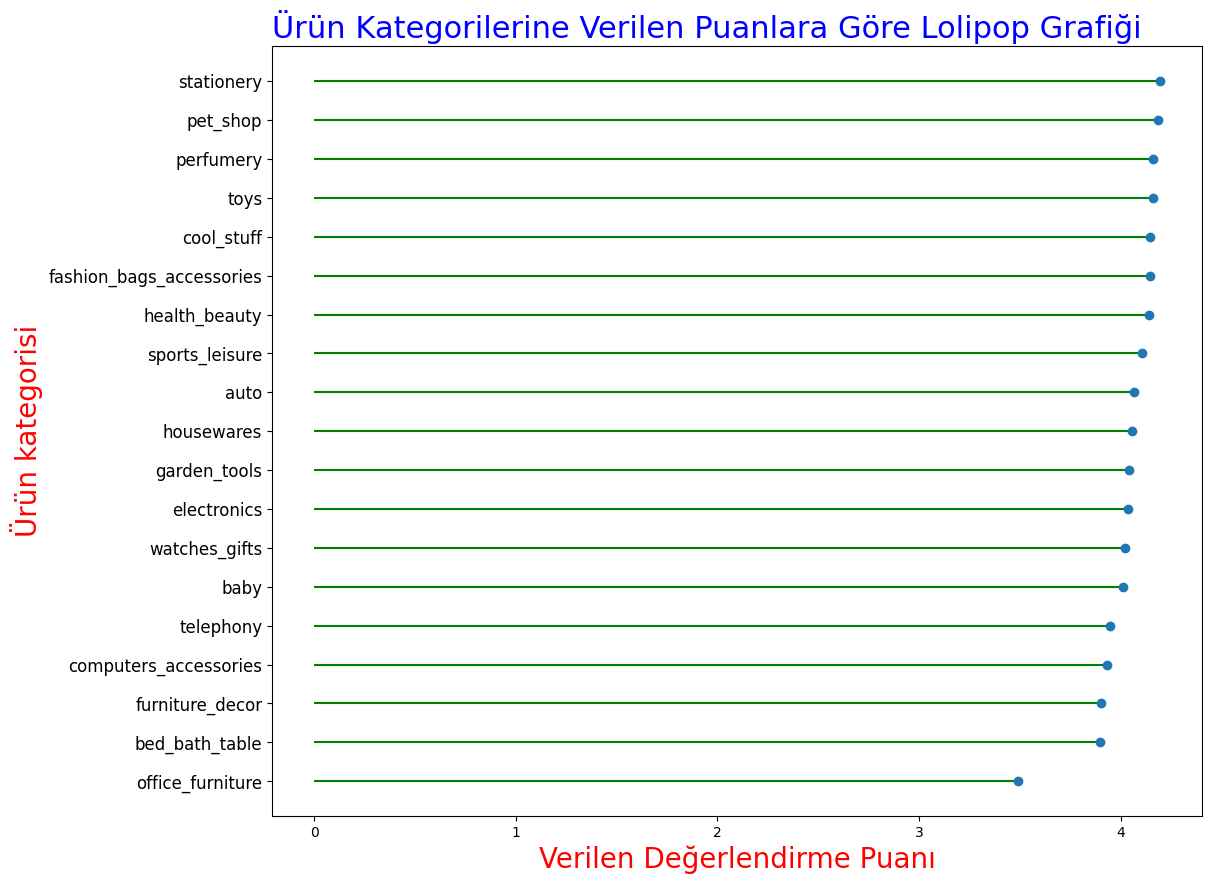

In [48]:
kategoriye_gore_ortalama_puan = kategoriye_gore_ortalama_puan.sort_values(by = 'mean')
my_range = range(1, len(kategoriye_gore_ortalama_puan.index) + 1)
 
plt.figure(figsize=(12, 10))
plt.hlines(y=my_range, xmin=0, xmax=kategoriye_gore_ortalama_puan['mean'], color = 'green')
plt.plot(kategoriye_gore_ortalama_puan['mean'], my_range, "o")
 
plt.yticks(my_range, kategoriye_gore_ortalama_puan['product_category'], color = "black", fontsize = 12)
plt.title("Ürün Kategorilerine Verilen Puanlara Göre Lolipop Grafiği", loc='left', size = 22, color = "blue")
plt.xlabel('Verilen Değerlendirme Puanı', fontsize = 20, color = "red")
plt.ylabel('Ürün kategorisi', fontsize = 20, color = "red")

plt.show()

In [49]:
check_dataset(orders)

Datasetimizde 99441 satır ve 8 sütun vardır. 

-----------------------------------------------------------------------------

Dataset içindeki değerlerimizin tipi 
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object şeklindedir.

-----------------------------------------------------------------------------

Datasetin ilk 5 satırını incelersek 
                           order_id                       customer_id  \
0                                 o  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21

In [50]:
explore_dataset(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Datasetimiz hakkında özet bilgi öğrenelim 
None 

-----------------------------------------------------------------------------

Datasetimiz hakkında daha fazla bilgi sahibi olabilmek için 
                               count unique                             

Bu sefer biraz daha fazla null değerimiz olmasına rağmen veri setimiz yeterince satıra sahip olduğundan bu satırları silebiliriz. Ne olur ne olmaz diye veri setini kopyalayıp öyle işlem yapalım çünkü ihtiyacımız olan satırları silebiliriz.

In [51]:
dropped_orders = orders.copy()
dropped_orders.dropna(axis = 0, inplace = True)
dropped_orders.shape

(96461, 8)

Çoğu değişkenimizin tarih formatlı olmasına rağmen object olarak göründüğünü görüyoruz. O yüzden önce onları datetime formatına çevirelim.

In [52]:
date = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for i in date:
    orders[i] = pd.to_datetime(orders[i])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Şimdi aylık olarak ne kadar sipariş verilmiş onun analizini yapalım

In [53]:
aylik_siparis = orders[['order_approved_at']].groupby(orders['order_approved_at'].dt.to_period('M')).agg({'order_approved_at' : 'count'})
order_per_month = orders[['order_approved_at']].groupby(orders['order_approved_at'].dt.to_period('M')).agg({'order_approved_at' : 'count'})
order_per_month = order_per_month.rename(columns = {'order_approved_at': 'approved_order_number'})
order_per_month = order_per_month.reset_index()

order_per_month['month_year'] = order_per_month['order_approved_at'].dt.strftime('%b - %Y')
order_per_month.head()

order_approved_at  approved_order_number  month_year
0           2016-09                      1  Sep - 2016
1           2016-10                    320  Oct - 2016
2           2016-12                      1  Dec - 2016
3           2017-01                    760  Jan - 2017
4           2017-02                   1765  Feb - 2017

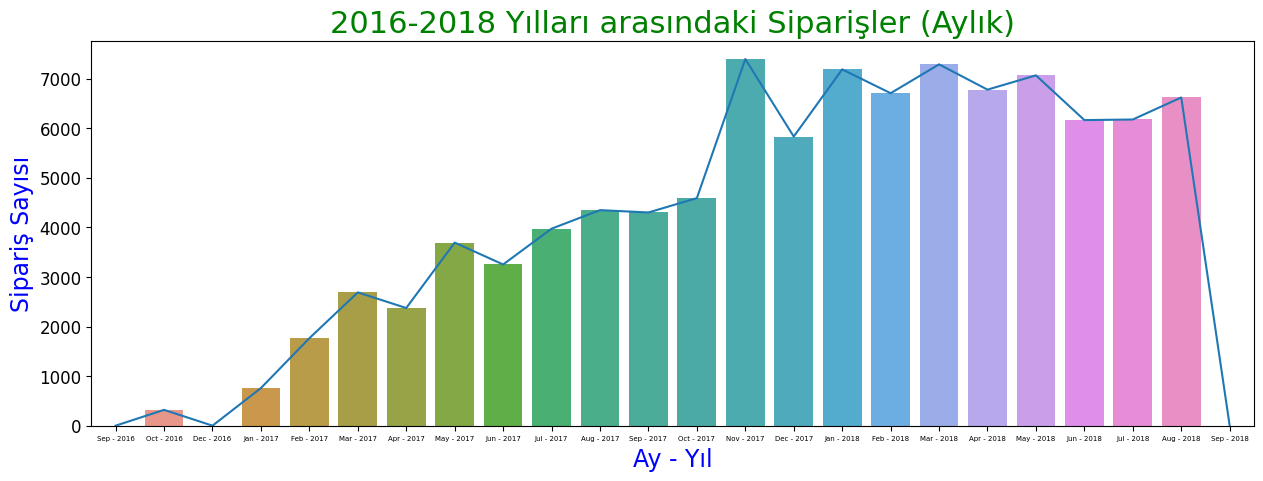

In [54]:
fig, ax = plt.subplots(figsize = (15, 5))
ax = sns.lineplot(x = 'month_year', y = 'approved_order_number', data = order_per_month)
ax = sns.barplot(x = 'month_year', y = 'approved_order_number', data= order_per_month)
ax.set_title('2016-2018 Yılları arasındaki Siparişler (Aylık)', fontsize = 22, color = "green")

plt.xlabel('Ay - Yıl', fontsize = 17, color = "blue")
plt.ylabel('Sipariş Sayısı', fontsize = 17, color = "blue")
plt.yticks(fontsize = 12, color = 'black');
plt.xticks(fontsize = 5);
plt.show()

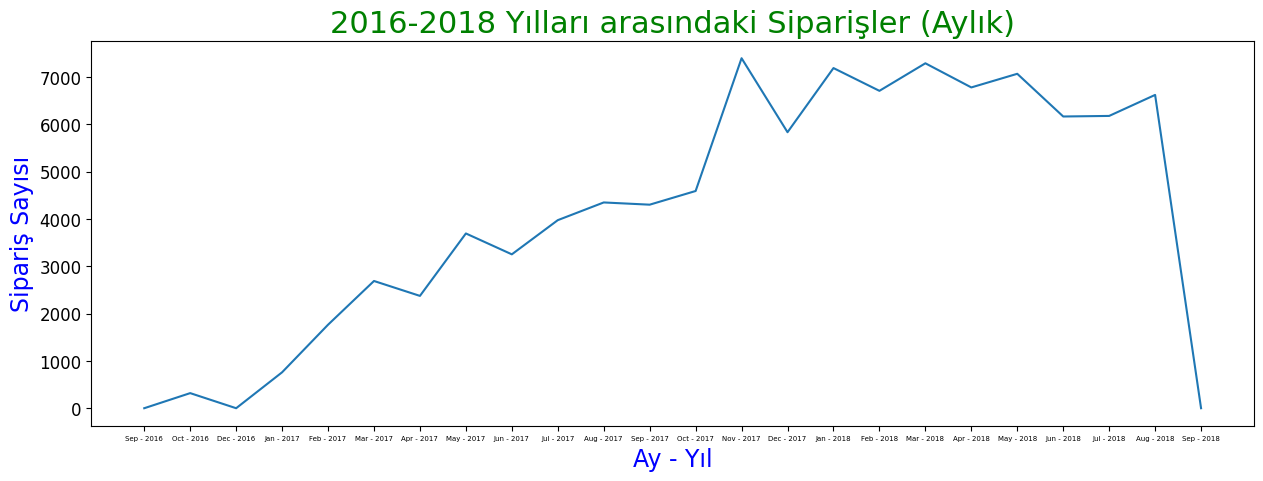

In [55]:
fig, ax = plt.subplots(figsize = (15, 5))
ax = sns.lineplot(x = 'month_year', y = 'approved_order_number', data = order_per_month)
ax.set_title('2016-2018 Yılları arasındaki Siparişler (Aylık)', fontsize = 22, color = "green")

plt.xlabel('Ay - Yıl', fontsize = 17, color = "blue")
plt.ylabel('Sipariş Sayısı', fontsize = 17, color = "blue")
plt.yticks(fontsize = 12, color = 'black');
plt.xticks(fontsize = 5);
plt.show()

In [56]:
orders['order_date'] = orders['order_purchase_timestamp'].astype('datetime64[ns]')

orders["order_year"] = orders["order_date"].dt.year
orders['order_day'] = orders['order_date'].dt.day_name()
orders['order_month'] = orders['order_date'].dt.month_name()
orders['order_hour'] = orders['order_date'].dt.hour

Bir sonraki analizimizde ise günlere göre sipariş sayıları inceleyelim. Sizce insanlar en çok hangi gün alışveriş yapmaya meyillidir?

In [57]:
order_per_day = orders.groupby(orders["order_day"])["order_id"].count().reset_index()
order_per_day = order_per_day.sort_values(by = "order_id", ascending = False)
order_per_day.rename(columns = {'order_day':'Days','order_id':'approved_order_number'}, inplace = True)
order_per_day

Days  approved_order_number
1     Monday                  16196
5    Tuesday                  15963
6  Wednesday                  15552
4   Thursday                  14761
0     Friday                  14122
3     Sunday                  11960
2   Saturday                  10887

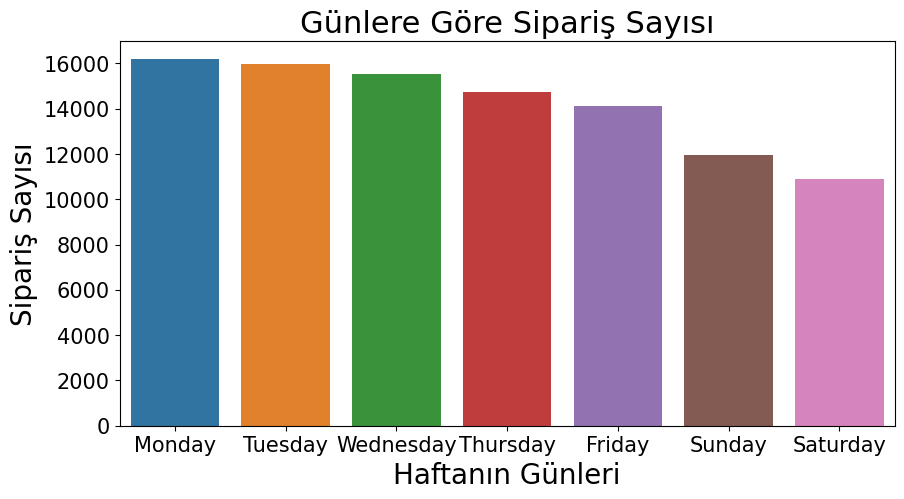

In [64]:
plt.figure(figsize=(10, 5))
sns.barplot(data = order_per_day, x = 'Days', y = 'approved_order_number')
plt.title("Günlere Göre Sipariş Sayısı", loc='center', size = 22, color = "black")
plt.yticks(fontsize = 15, color = 'black');
plt.xticks(fontsize = 15);
plt.xlabel('Haftanın Günleri', fontsize = 20, color = "black")
plt.ylabel('Sipariş Sayısı', fontsize = 20, color = "black")
plt.show()

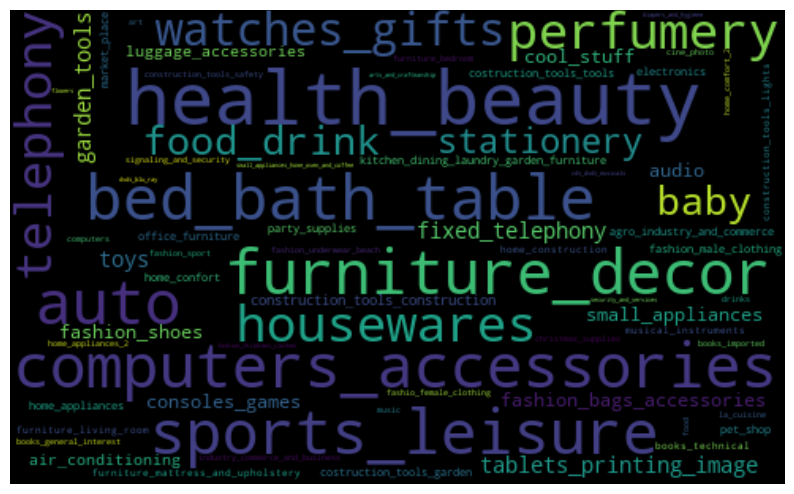

In [59]:
categories = product_category.product_category_name_english.unique()

plt.subplots(figsize =(10, 10))
wordcloud = WordCloud(
                        background_color = 'black',
                        width = 490,
                        height = 300
                        ).generate(" ".join(categories))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()